## Email Spam Detection: Classify emails as spam or not spam using Natural Language Processing (NLP)  


Required Packages Installation 


In [24]:
pip install pandas matplotlib seaborn nltk wordcloud scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\chsan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


## Importing Required Packages 

### The packages in the provided imports are:

pandas (imported as pd)

matplotlib.pyplot (imported as plt)

seaborn (imported as sns)

nltk (Natural Language Toolkit)

string (a standard Python library)

collections (imported for Counter, a standard Python library)

wordcloud (for generating word clouds)

sklearn (Scikit-learn)

sklearn.preprocessing (for LabelEncoder)

sklearn.feature_extraction.text (for TfidfVectorizer)

sklearn.model_selection (for train_test_split)

sklearn.metrics (for evaluation metrics like accuracy_score, confusion_matrix, precision_score)

sklearn.svm (for SVC, Support Vector Classifier)

sklearn.ensemble (for RandomForestClassifier)

sklearn.naive_bayes (for MultinomialNB, Naive Bayes classifier)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#Downloading Sub Modules of NlTK package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chsan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Importing the Dataset

In [26]:
data = pd.read_csv("emails.csv")
data.sample(5)

,text,spam
5694,Subject: ljm model ryan : this is the update...,0
1777,"Subject: re : london visit paul , i shall be...",0
1153,Subject: = ? iso - 8859 - 1 ? q ? fw : _ cd _ ...,1
1328,"Subject: all graphics software available , che...",1
2755,Subject: fwd : abstract return - path : from...,0


### Plotting Distribution of Spam and Non-Spam Emails In Data Set

#### The chart displays the proportions of spam and non-spam emails with percentages and labels.

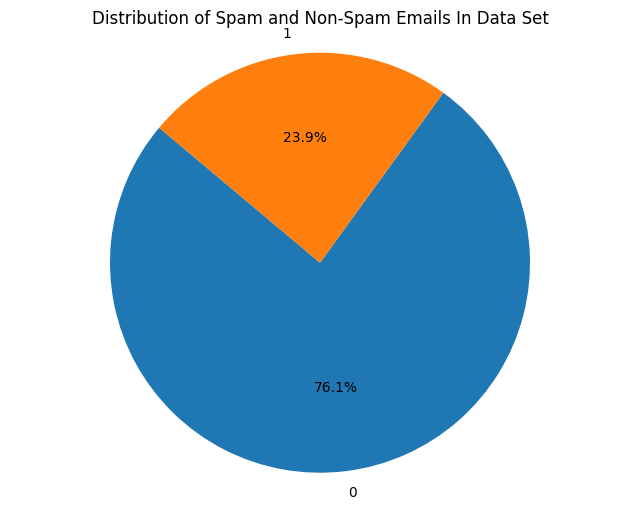

In [27]:
data['spam'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['spam'].value_counts(), labels=data['spam'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails In Data Set')
plt.axis('equal') 
plt.show()

## Plotting Average Length of Emails for Spam and Non Spam
#### The code calculates various text features, including the length of the emails, the number of words, and the number of sentences. It then computes the average length of spam and non-spam (ham) emails. Finally, it visualizes the average lengths using a bar chart comparing spam and non-spam emails.

Average Length of Spam Emails: 1317.2573099415204
Average Length of Ham Emails: 1631.918119266055


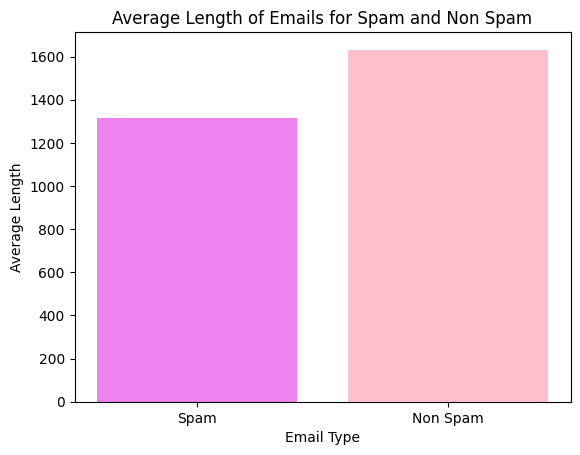

In [30]:



data['Length'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(word_tokenize).apply(len)
data['num_sentence'] = data['text'].apply(sent_tokenize).apply(len)
data.head(2)
avg_length_spam = data[data['spam'] == 1]['Length'].mean()
avg_length_ham = data[data['spam'] == 0]['Length'].mean()
#plotting
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

plt.bar(['Spam', 'Non Spam'], [avg_length_spam, avg_length_ham], color=['violet', 'pink'])
plt.title('Average Length of Emails for Spam and Non Spam')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

## Calculating Average Length of Spam Emails and Non Spam Emails

#### displaying the average length of spam and non-spam emails:

In [31]:

avg_length_spam = data[data['spam'] == 1]['Length'].mean()
avg_length_ham = data[data['spam'] == 0]['Length'].mean()

print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

Average Length of Spam Emails: 1317.2573099415204
Average Length of Ham Emails: 1631.918119266055


##  Data Preprocessing

#### The code preprocesses the text by converting it to lowercase, tokenizing, removing special characters, stopwords, and punctuation, applying stemming, and then converting the text back into a string. The final preprocessed text is stored in the transform_text column.

In [32]:

data['transform_text'] = data['text'].str.lower()
# Tokenization
data['transform_text'] = data['transform_text'].apply(word_tokenize)

# Removing special characters
data['transform_text'] = data['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
data['transform_text'] = data['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text   
0  Subject: naturally irresistible your corporate...  \
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                      transform_text  
0  subject natur irresist corpor ident lt realli ...  
1  subject stock trade gunsling fanni merril muzo...  
2  subject unbeliev new home made easi im want sh...  
3  subject 4 color print special request addit in...  
4  subject money get softwar cd softwar compat gr...  


###  Plotting Most Common Words in Spam Emails

subject: 1577 occurrences
compani: 1065 occurrences
com: 1000 occurrences
1: 952 occurrences
mail: 917 occurrences
busi: 897 occurrences
email: 865 occurrences
inform: 818 occurrences
receiv: 727 occurrences
e: 701 occurrences
get: 694 occurrences
5: 687 occurrences
money: 662 occurrences
pleas: 619 occurrences
2: 613 occurrences
free: 606 occurrences
3: 604 occurrences
make: 603 occurrences
http: 603 occurrences
market: 600 occurrences
time: 593 occurrences
one: 592 occurrences
000: 560 occurrences
click: 552 occurrences
use: 546 occurrences
order: 541 occurrences
invest: 540 occurrences
us: 537 occurrences
offer: 528 occurrences
secur: 520 occurrences
Top 30 Most Common Words in Spam Emails:


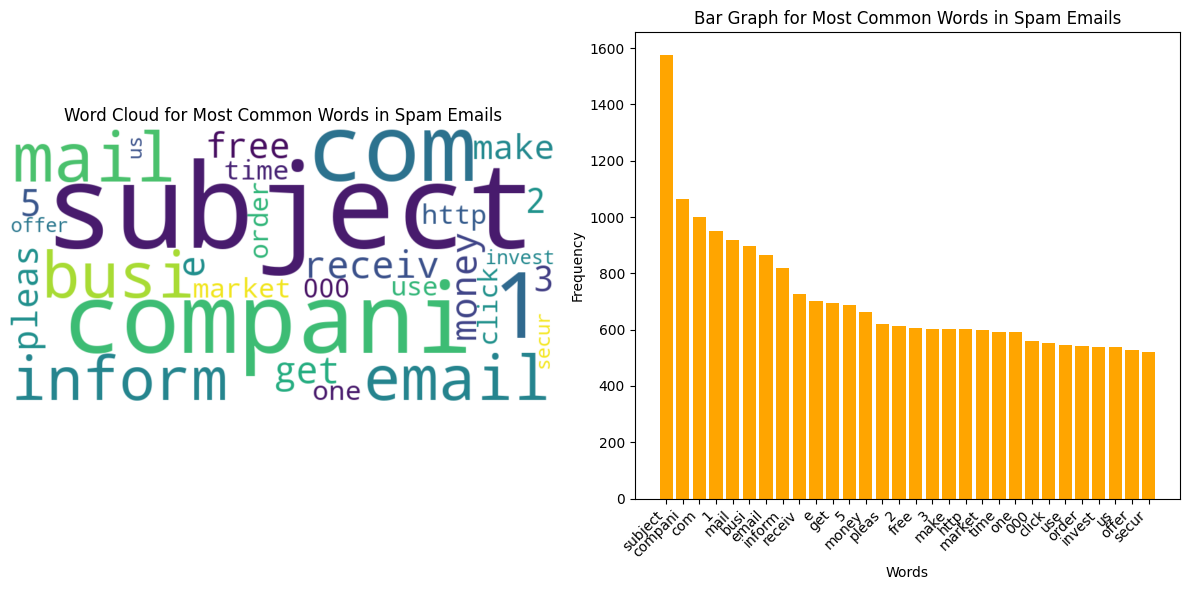

In [33]:
spam_emails = data[data['spam'] == 1]['transform_text']
# Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(30)
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud

print("Top 30 Most Common Words in Spam Emails:")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Plotting Most Common Words in Non Spam Emails

Top 10 Most Common Words in Non Spam Emails:
enron: 13388 occurrences
ect: 11417 occurrences
subject: 8625 occurrences
vinc: 8531 occurrences
hou: 5569 occurrences
2000: 4935 occurrences
kaminski: 4801 occurrences
pleas: 4494 occurrences
com: 4444 occurrences
would: 4151 occurrences
cc: 3889 occurrences
j: 3693 occurrences
thank: 3558 occurrences
pm: 3262 occurrences
2001: 3060 occurrences
forward: 2952 occurrences
research: 2752 occurrences
time: 2552 occurrences
meet: 2544 occurrences
1: 2490 occurrences


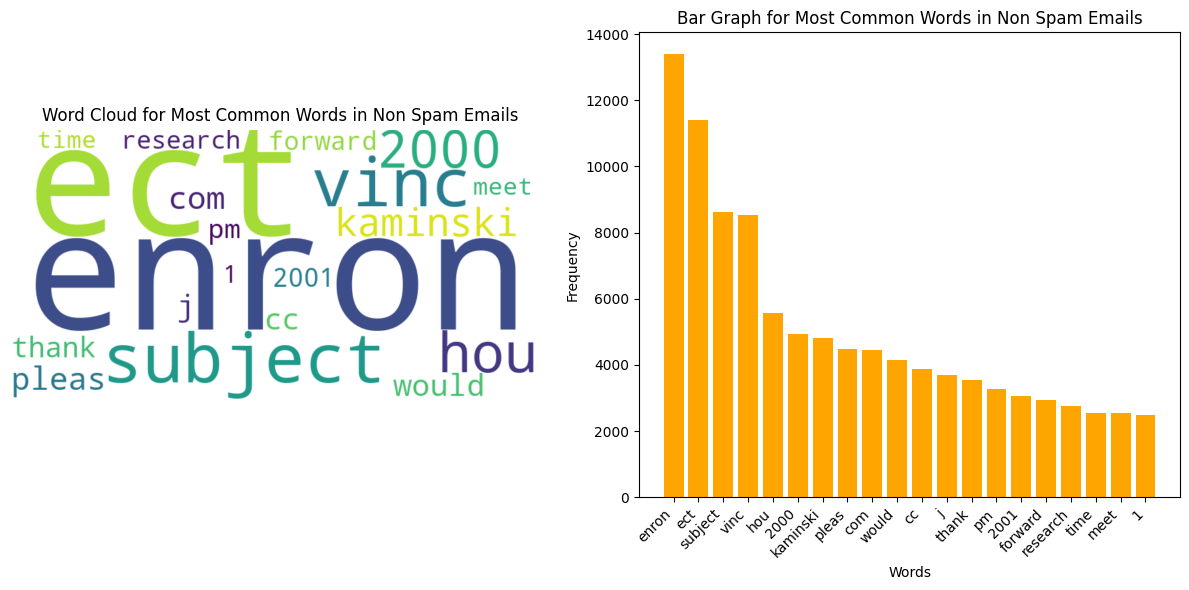

In [34]:
ham_emails = data[data['spam'] == 0]['transform_text']
# Tokenize the text in spam emails
ham_words = ' '.join(ham_emails).split()
# Count occurrences of each word
word_counts = Counter(ham_words)
# Find the most common words
most_common_words = word_counts.most_common(20)

print("Top 10 Most Common Words in Non Spam Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Non Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Non Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.986005      0.595949
num_words     0.986005   1.000000      0.660650
num_sentence  0.595949   0.660650      1.000000


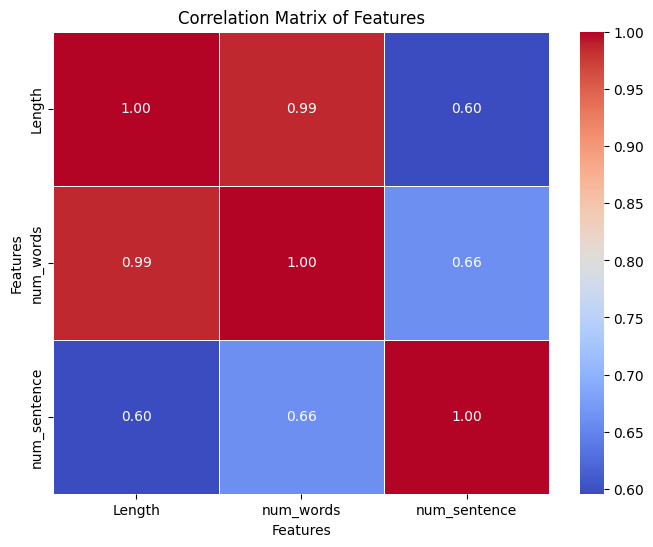

In [35]:
correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

## Converting Data for Machine Learning: Label Encoding & Vectorization

#### Preprocesses the text data, converts categorical labels to numeric values, and splits the data into training and testing sets for machine learning tasks.

In [36]:
encoder = LabelEncoder()
data['spam'] = encoder.fit_transform(data['spam'])
data.sample(2)

#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['text']).toarray()
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

###  Model 1- SVC

In [37]:
#Model 1- SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :")
print(confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.99
confusion Matrix :
[[854   2]
 [ 10 280]]
Precision Score:  0.9929078014184397


###  Model 2- Random Forest classifier

In [38]:
#Model 2- Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("confusion Matrix :")
print(confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.98
confusion Matrix :
[[856   0]
 [ 24 266]]
Precision Score:  1.0


###  Model 3- Naive Bayes classifier

In [39]:
#Model 3- Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("confusion Matrix :")
print(confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))


Naive Bayes Accuracy: 0.98
confusion Matrix :
[[850   6]
 [ 22 268]]
Precision Score:  0.9781021897810219


##  Comparison of Accuracy and Precision Scores for Different Classifiers

#### This code compares the performance of three classifiers—SVC, Random Forest, and Naive Bayes—by calculating their accuracy and precision scores. It then visualizes the results in two bar plots: one for accuracy comparison and the other for precision scores, allowing a clear comparison of classifier effectiveness.

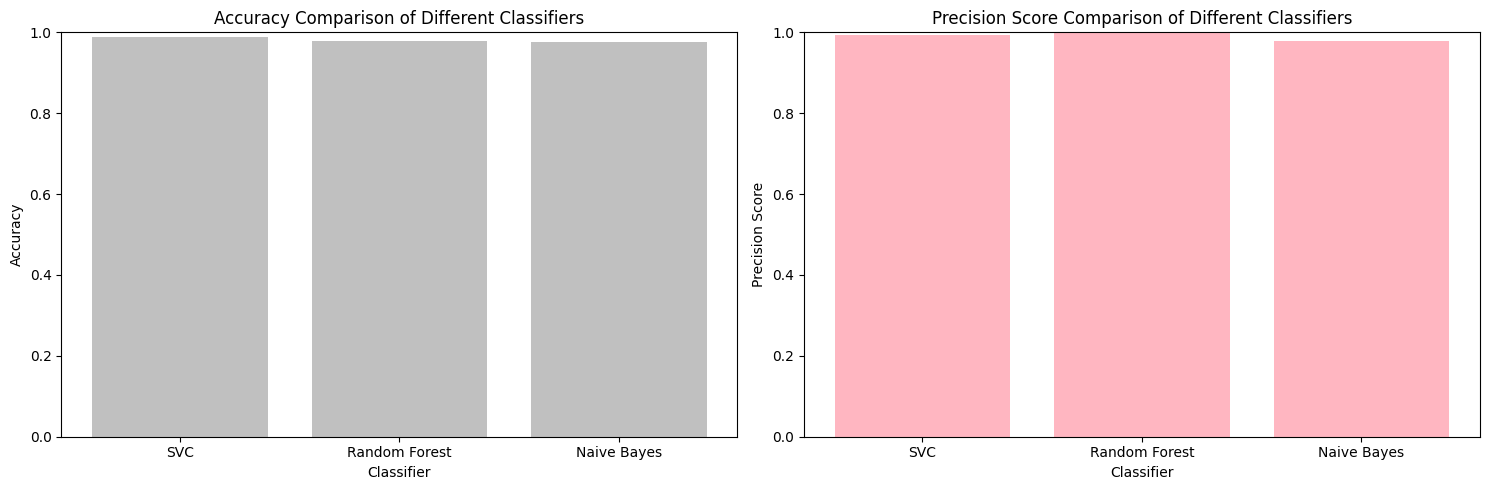

In [40]:
# Calculate precision scores for each classifier
precision_svc = precision_score(y_test, y_pred_svc)
precision_rf = precision_score(y_test, y_pred_rf)
precision_nb = precision_score(y_test, y_pred_nb)

# Create lists to store accuracies and precision scores
classifiers = ['SVC', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_svc, accuracy_rf, accuracy_nb]
precision_scores = [precision_svc, precision_rf, precision_nb]

# Plot bar graph for accuracies and precision scores side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot bar graph for accuracies
axes[0].bar(classifiers, accuracies, color='silver')
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison of Different Classifiers')
axes[0].set_ylim(0, 1)

# Plot bar graph for precision scores
axes[1].bar(classifiers, precision_scores, color='lightpink')
axes[1].set_xlabel('Classifier')
axes[1].set_ylabel('Precision Score')
axes[1].set_title('Precision Score Comparison of Different Classifiers')
axes[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()


##  Spam Detection Using SVM Classifier on New Email Data

#### This code uses a trained SVM model to classify new email messages as either spam or not spam. It first converts the emails into numerical vectors using a TF-IDF vectorizer, then applies the SVM classifier to make predictions and prints the results for each email.

In [41]:
new_emails = [
    "Get a free iPhone now!",
    "Hey, how's it going?",
    "Congratulations! You've won a prize!",
    "Reminder: Meeting at 2 PM tomorrow."
]

# Convert new data into numerical vectors using the trained tfidf_vectorizer
new_X = tfidf.transform(new_emails)
new_X_dense = new_X.toarray()

# Use the trained SVM model to make predictions
svm_predictions = svc_classifier.predict(new_X_dense)

# Print the predictions
for email, prediction in zip(new_emails, svm_predictions):
    if prediction == 1:
        print(f"'{email}' is predicted as spam.")
    else:
        print(f"'{email}' is predicted as Not Spam.")

'Get a free iPhone now!' is predicted as spam.
'Hey, how's it going?' is predicted as Not Spam.
'Congratulations! You've won a prize!' is predicted as Not Spam.
'Reminder: Meeting at 2 PM tomorrow.' is predicted as Not Spam.


##  Spam Classification for User-Input Emails Using SVM Model

#### This code allows users to input an email text and predicts whether it is spam or not. The email is converted into a numerical vector using a trained TF-IDF vectorizer, and then an SVM model is used to classify it as spam or not spam, with the result displayed to the user.

In [42]:
def predict_email(email):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    email_vector = tfidf.transform([email])
    
    # Convert sparse matrix to dense array
    email_vector_dense = email_vector.toarray()
    
    # Use the trained SVM model to make predictions
    prediction = svc_classifier.predict(email_vector_dense)
    
    # Print the prediction
    if prediction[0] == 1:
        print("The email is predicted as spam.")
    else:
        print("The email is predicted as Not Spam.")

# Get user input for email
user_email = input("Enter the email text: ")

# Predict whether the input email is spam or ham
predict_email(user_email)

Enter the email text: asdasd
The email is predicted as Not Spam.
